# intro to machine learning
## exercise 1: linear regression

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### set up test case

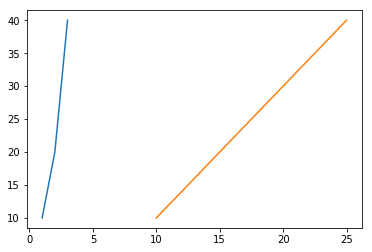

In [351]:
# two random features
test_X = pd.DataFrame([
    [1, 2, 3,],
    [10, 15, 25,]
]).transpose()

test_theta = [5, 10, 1]

test_y = pd.Series([10, 20, 40])

plt.plot(test_X[0], test_y)
plt.plot(test_X[1], test_y)

### feature normalization
subtract by mean and divide by std

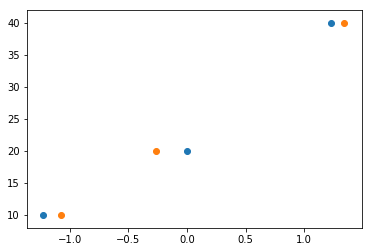

In [352]:
def normalize(X):
    sigma= np.std(X)
    mu = np.mean(X)
    return (X - mu) / sigma

test_X = normalize(test_X)

plt.scatter(test_X[0], test_y)
plt.scatter(test_X[1], test_y)

### hypothesis function

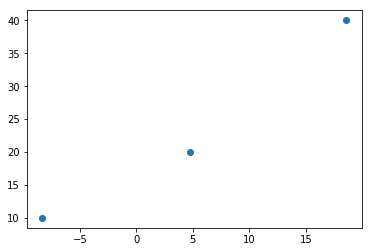

In [353]:
def hypothesis(theta, X):
    '''
    Define the hypothesis function, which is a simple linear function with n + 1 coefficients,
    where n is the number of features
    
    return the vector y_hat, the predicted values
    '''
    if not isinstance(X, pd.DataFrame):
        X = X.to_frame()
        
    # make a copy
    df = X.copy()
    
    # add extra column of ones 
    df.insert(0, 'y-intercept', 1)
    
    # multiply each row by theta, elementwise
    df = df.multiply(theta)
    
    # add all values per row
    predictions = df.sum(axis=1)
    
    return predictions

# predictions vs actual
plt.scatter(hypothesis(test_theta, test_X), test_y)

### cost function

In [354]:
def cost(theta, X, y):
    '''
    Define the cost function J for a linear function. 
    This tells you how good your hypothesized thetas estimate the line that best predicts y

    calculation:

       J = sum of squared differences between hypothesized values h(X) and actual values y,
           and the sum is then multiplied by (2 * m )**-1, where m is the sample size
    '''
    # sample size
    m = len(y)
    
    # diff
    difference = hypothesis(theta, X) - y

    # square
    squared = difference**2
    
    # sum
    summed = squared.sum()
    
    # coef
    return 1 / (2 * m) * summed

cost(test_theta, test_X, test_y)

171.2064599655476

### Gradient Descent

In [355]:
def gradientDescent(theta, iterations, alpha, X, y):
    '''
    Gradient descent is a function that loops through the derivative of the cost function, 
    and adjusts theta iteratively by the stepsize alpha to reduce the cost with each loop. 
    Eventually it arrives at a point where the cost cannot further be reduced. 
    
    inputs:
        theta: the theta vector at which to start the gradient descent

        iterations: number of steps the descent should take

        alpha: the size of each step

        X: the features of the dataset

        y: the target values
    
    returns: 
        theta: a vector of tuned coefs
        
        j_history: a vector of the cost calculated at each step 
    '''
    
    m = len(y)
    
    j_history = pd.DataFrame(columns=[
        'theta',
        'j'
    ]) 
    
    if not isinstance(X, pd.DataFrame):
        X = X.to_frame()

    # copy X and add a column
    X_copy = X.copy()
    X_copy.insert(0, 'y-intercept', 1)
    
    for i in range(iterations):
        temp_theta = np.ones(len(theta))
        
        for t in range(len(theta)):
            # partial derivative in terms of theta_t
            derivative = (
                hypothesis(theta, X)\
                    .subtract(y)\
                    .multiply(X_copy.iloc[:,t])\
                    .sum(axis=0)\
                    * (1/m)
            )
            
            # take a step and calculate new theta_t
            temp_theta[t] = theta[t] - alpha * derivative
        
        
        # record cost at this step
        j_history = j_history.append({
            'theta': np.round_(temp_theta, 3),
            'j': cost(temp_theta, X, y)
        },
            ignore_index=True
        )
        
        # copy new thetas to be used for next step
        theta = temp_theta.copy()
    
    return theta, j_history

gradientDescent(test_theta, 100, .1, test_X, test_y)

(array([23.33284637,  8.96433568,  3.50785561]),
                       theta           j
 0    [6.833, 10.127, 1.165]  138.884918
 1    [8.483, 10.224, 1.302]  112.767164
 2    [9.968, 10.299, 1.415]   91.651597
 3   [11.305, 10.355, 1.509]   74.573092
 4   [12.508, 10.396, 1.589]   60.755153
 5    [13.59, 10.425, 1.656]   49.572196
 6   [14.565, 10.445, 1.714]   40.519670
 7   [15.441, 10.457, 1.764]   33.190284
 8   [16.231, 10.462, 1.808]   27.255032
 9   [16.941, 10.463, 1.847]   22.447993
 10    [17.58, 10.46, 1.882]   18.554144
 11  [18.155, 10.454, 1.914]   15.399555
 12  [18.673, 10.446, 1.943]   12.843495
 13   [19.139, 10.435, 1.97]   10.772070
 14  [19.559, 10.423, 1.996]    9.093092
 15   [19.936, 10.409, 2.02]    7.731926
 16  [20.276, 10.395, 2.043]    6.628146
 17  [20.582, 10.379, 2.065]    5.732823
 18  [20.857, 10.363, 2.087]    5.006336
 19  [21.104, 10.347, 2.108]    4.416597
 20   [21.327, 10.33, 2.128]    3.937621
 21  [21.528, 10.313, 2.148]    3.548363
 22  [21

### predicted vs actual

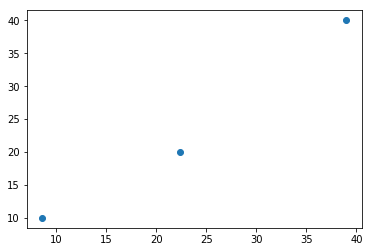

In [356]:
plt.scatter(
    hypothesis(
        gradientDescent(test_theta, 100, .1, test_X, test_y)[0], 
        test_X), 
    test_y)

### demo for single var

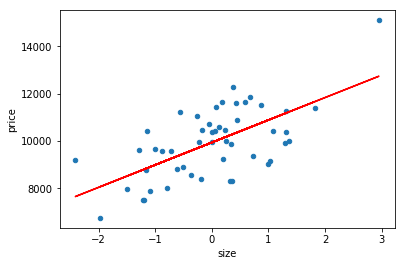

In [357]:
# generate data
data = pd.DataFrame({
    'size': np.random.normal(100, 10, 50)
})

data['price'] = data['size'].apply(lambda x: x * np.random.randint(80, 120))

# normalize x
data['size'] = normalize(data['size'])

# plot points
data.plot.scatter(x='size', y='price')

# compute theta
theta = gradientDescent([1,1], 100, .1, data['size'], data.price)[0]

# plot regression
plt.plot(
    data['size'],
    hypothesis(theta, data['size']),
    c='r'
)

### compare results to statsmodels

In [358]:
# my code
gradientDescent([22, 1e-10, 10], 1000, .001, test_X, test_y)[0]

array([22.84307277,  1.04402666, 11.08817573])

In [359]:
# https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

import statsmodels.api as sm

# Note the difference in argument order

model = sm.OLS(
    test_y, 
    sm.add_constant(test_X)
).fit()

# predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/nico/code/pydata-env/lib/python3.6/site-packages/statsmodels/regress

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 08 May 2018   Prob (F-statistic):                nan
Time:                        08:23:33   Log-Likelihood:                 96.870
No. Observations:                   3   AIC:                            -187.7
Df Residuals:                       0   BIC:                            -190.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3333        inf          0        nan         nan         nan
0           1.332e-14        inf          0        nan         nan         nan
1             12.4722        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.600
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.354
Skew:                          -0.382   Prob(JB):                        0.838
Kurtosis:                       1.500   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
# what is the cost of the statsmodels function?
cost([23.33, 1.3e-14, 12.47], test_X, test_y)

7.956429836395348e-06

---

---

## apply to the data from the exercise

In [361]:
houses = pd.read_csv('ex1data2.txt', names=['space', 'rooms', 'prices'])
houses.describe()

,space,rooms,prices
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


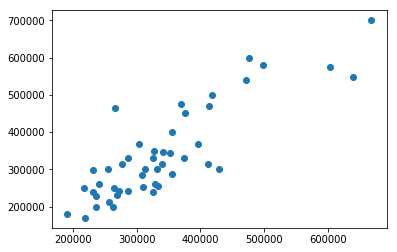

In [392]:
X = houses[['space', 'rooms']]
y = houses.prices

# normalize
X = normalize(X)

# apply gradient descent
# compare predicted to actual
plt.scatter(
    hypothesis(
        gradientDescent([1,1,1], 1000, .01, X, y)[0], 
        X), 
    y
)

### try different learning rates

Text(0,0.5,'cost')

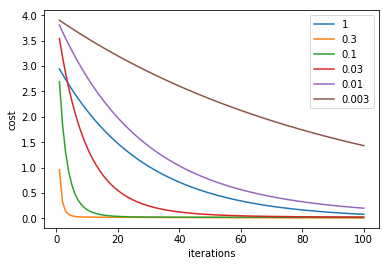

In [393]:
alphas = [
    1,
    .3,
    .1,
    .03,
    .01,
    .003
]

iterations = 100

for a in alphas:
    plt.plot(
        np.linspace(1, iterations, 100),
        gradientDescent([22, 1e-10, 10], iterations, a, test_X, test_y)[1]['j'],
        label=str(a)
    )

plt.legend()
plt.xlabel('iterations')
plt.ylabel('cost')

it looks like the best learning rate is 0.3

### predict the price of a house
1650 square feet

3 bedrooms

In [394]:
theta = gradientDescent([1,1,1], 1000, .3, X, y)[0]
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [371]:
data = normalize(pd.DataFrame({
        0:[1650], 
        1:[3]
    }))

hypothesis(theta,data)

0    340412.659574
dtype: float64

### implement the normal equation

In [385]:
X['y-intercept'] = 1

X = X.reindex(columns=[
    'y-intercept', 
    'space', 
    'rooms'
])

# multiply the matrix by its transposition 
X.T.dot(X).values

array([[ 4.70000000e+01, -4.44089210e-16,  1.16573418e-14],
       [-4.44089210e-16,  4.70000000e+01,  2.63184586e+01],
       [ 1.16573418e-14,  2.63184586e+01,  4.70000000e+01]])

In [386]:
# take the inverse
np.linalg.inv(X.T.dot(X).values)

array([[ 2.12765957e-02,  4.59779739e-18, -7.85181890e-18],
       [ 4.59779739e-18,  3.09957128e-02, -1.73565826e-02],
       [-7.85181890e-18, -1.73565826e-02,  3.09957128e-02]])

In [389]:
# multiplied by its. inverse
np.linalg.inv(X.T.dot(X).values).dot(X.T)

array([[ 0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,  0.0212766 ,
         0.0212766 ,  0.0212766 ],
       [ 0.00799752, -0.01187247,  0.0196672 ,  0.00392813,  0.02026723,
        -0.01974873, -0.01447449, -0.01869292, -0.02054588, -0.01605147,
        -0.02152283,  0.00389737, -0.00043934,  0.05548204, -0.02496143,
        -0.00732998,  0.00014337, -0.02622302,  0.00485222,  0.02148939,
        -0.00528

In [390]:
# multiplied by the target vector
np.linalg.inv(X.T.dot(X).values).dot(X.T).dot(y)

array([340412.65957447, 109447.79646964,  -6578.35485416])